Based on Tutorial from: https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

Visualization of a Convolutional Layer Generating a Feature Map
![](https://miro.medium.com/max/960/1*Y0tvNnH7sXHw2zP7TrCKgA.gif)

In [1]:
import matplotlib.pyplot as plt
from numpy import expand_dims
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [2]:
# load vgg model
# load the model
model = VGG16()
# summarize the model
model.summary()

553467904/553467096 [==============================] - 20s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [3]:
# summarize filter shapes
for layer in model.layers:
  # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    else:
    # get filter weights
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [4]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [12]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

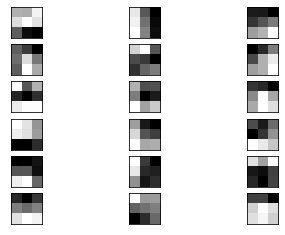

In [13]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [17]:
# load the image with the required shape
img = load_img('White_Sturgeon_(Acipenser_transmontanus)_(7007251148).jpg', target_size=(224, 224))

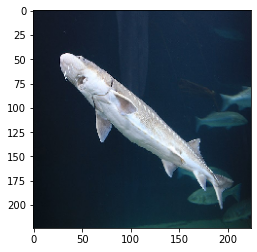

In [18]:
plt.imshow(img)

In [19]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'

In [20]:
img.shape

(224, 224, 3)

In [21]:
img = expand_dims(img, axis=0)

In [22]:
img.shape

(1, 224, 224, 3)

In [23]:
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [28]:
model.inputs

[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>]

In [29]:
# redefine model to output right after the first hidden layer
conv_out_index = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in conv_out_index]
model = keras.Model(inputs=model.inputs, outputs=outputs)

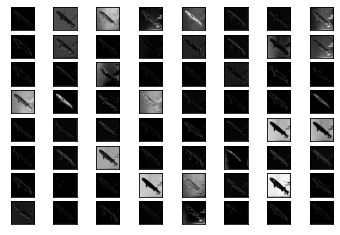

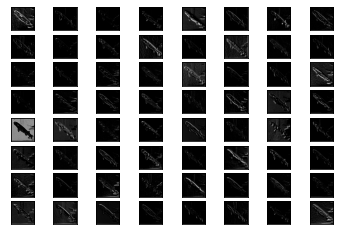

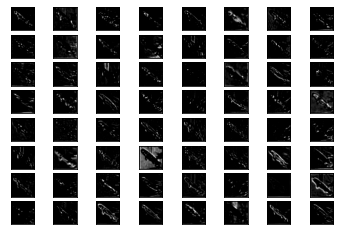

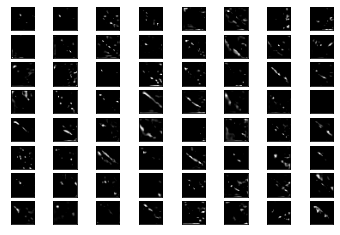

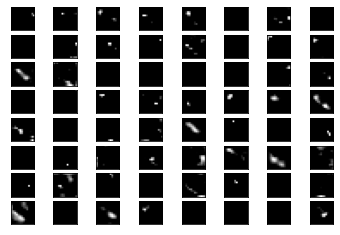

In [32]:
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
plot_shape = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	conv_out_index = 1
	for _ in range(plot_shape):
		for _ in range(plot_shape):
			# specify subplot and turn of axis
			ax = plt.subplot(plot_shape, plot_shape, conv_out_index)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, conv_out_index-1], cmap='gray')
			conv_out_index += 1
	# show the figure
	plt.show()